In [1]:
import pandas as pd #Importing pandas library
import numpy as np #Importing numpy library
import matplotlib.pyplot as plt #Importing Matplotlib library's "pyplot"
import seaborn as sns  # Imorting Seaborn library
import os

In [2]:
data = pd.read_csv("parkinsons_updrs.data.csv")
data.drop(["motor_UPDRS"], axis=1, inplace=True)
#data.drop(["subject#"], axis=1, inplace=True)

In [3]:
X = data.drop(["total_UPDRS"], axis=1) 
y = data.total_UPDRS.values

In [4]:
#Splitting the data for training and testing
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
from sklearn import linear_model

#ridge with cross validation
from sklearn.linear_model import RidgeCV
plr = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
y_pred=plr.fit(x_train, y_train)
plr.alpha_
plr.predict(x_test)

#elastic net 
# from sklearn.linear_model import ElasticNet
# plr = ElasticNet(random_state=0)
# plr.fit(x_train, y_train)
# plr.predict(x_test)

array([31.06377806, 37.65023652, 24.27380057, ..., 35.92626989,
       26.4686622 , 23.92895663])

In [6]:
plr.score(x_test, y_test)

0.22900180399861714

In [7]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

y_pred_train = plr.predict(x_train)
y_pred_test = plr.predict(x_test)

accuracy_train = r2_score(y_train, y_pred_train)
print("Training Accuracy for Linear Penalized Model: ", accuracy_train)

accuracy_test = r2_score(y_test, y_pred_test)
print("Testing Accuracy for Linear Penalized Model: ", accuracy_test)

RMSE_train = sqrt(mean_squared_error(y_train, y_pred_train))
print("RMSE for Training Data: ", RMSE_train)

RMSE_test = sqrt(mean_squared_error(y_test, y_pred_test))
print("RMSE for Testing Data: ", RMSE_test)

Training Accuracy for Linear Penalized Model:  0.25445157604299706
Testing Accuracy for Linear Penalized Model:  0.22900180399861714
RMSE for Training Data:  9.268727307583712
RMSE for Testing Data:  9.270310457881976


In [8]:
true_val = y_train
pred_val = y_pred_train

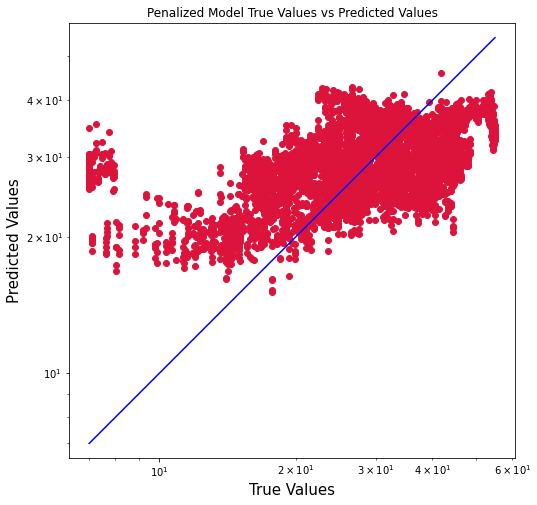

In [9]:
plt.figure(figsize=(8,8))
plt.scatter(true_val, pred_val, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(pred_val), max(true_val))
p2 = min(min(pred_val), min(true_val))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Penalized Model True Values vs Predicted Values")
plt.axis('equal')
plt.show()
